## 3 Visualisations 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

In [4]:
df = pd.read_csv('data_raw/insurance_transformed.csv')
df.head()

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


Start by calculating the average cost by region, to see if there is any difference in the costs based on location. 

In [13]:
regions = ['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
average_costs = {}

for region in regions:
    filtered_df = df[df[region] == 1]
    avg_cost = filtered_df['charges'].mean()
    average_costs[region] = avg_cost  
    print(f"{region}: {avg_cost}")

region_northeast: 13406.384516385804
region_northwest: 12450.840843950617
region_southeast: 14735.411437609888
region_southwest: 12346.937377292308


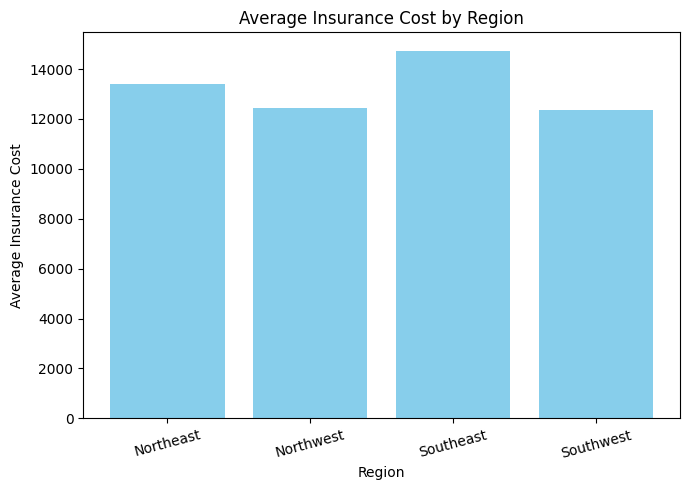

In [14]:
cleaned_labels = [label.replace('region_', '').capitalize() for label in average_costs.keys()]

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.bar(cleaned_labels, average_costs.values(), color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Insurance Cost')
plt.title('Average Insurance Cost by Region')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Calculate average cost by smoking preference 

In [15]:

avg_smoker = df[df['smoker_encoded'] == 1]['charges'].mean()


avg_nonsmoker = df[df['smoker_encoded'] == 0]['charges'].mean()

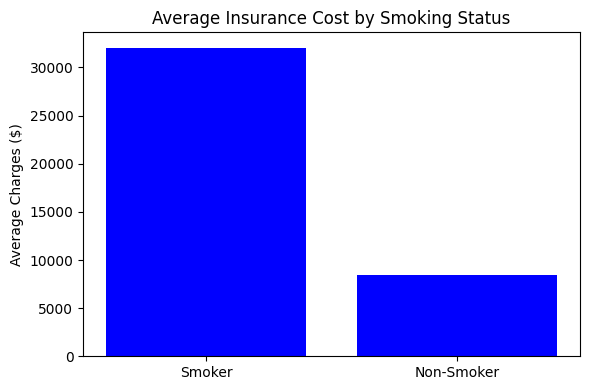

In [16]:

smoker_costs = {
    'Smoker': avg_smoker,
    'Non-Smoker': avg_nonsmoker
}

# Plot
import matplotlib.pyplot as plt

categories = list(smoker_costs.keys())
values = list(smoker_costs.values())

plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['blue', 'blue'])
plt.title('Average Insurance Cost by Smoking Status')
plt.ylabel('Average Charges ($)')
plt.tight_layout()
plt.show()







Compare Insurance costs with smoking status, BMI and age 

In [18]:

df['bmi_scaled'] = df['bmi'] / df['bmi'].max() * 30  # Adjust size range
df['smoker_status'] = df['smoker_encoded'].map({0: 'Non-Smoker', 1: 'Smoker'})
df['age_jittered'] = df['age'] + np.random.uniform(-0.5, 0.5, size=len(df))

fig = px.scatter(
    df,
    x='age_jittered',
    y='charges',
    size='bmi_scaled',
    color='smoker_status',
    symbol='smoker_status',
    size_max=30,
    opacity=0.6,
    title='Insurance Charges by Age, BMI & Smoking Status',
    labels={
        'age_jittered': 'Age',
        'charges': 'Insurance Charges ($)',
        'bmi_scaled': 'BMI (Scaled)',
        'smoker_status': 'Smoker'
    }
)

fig.update_layout(
    xaxis=dict(title='Age'),
    yaxis=dict(title='Insurance Charges ($)'),
    template='plotly_white'
)

fig.show()
